# 示例数据

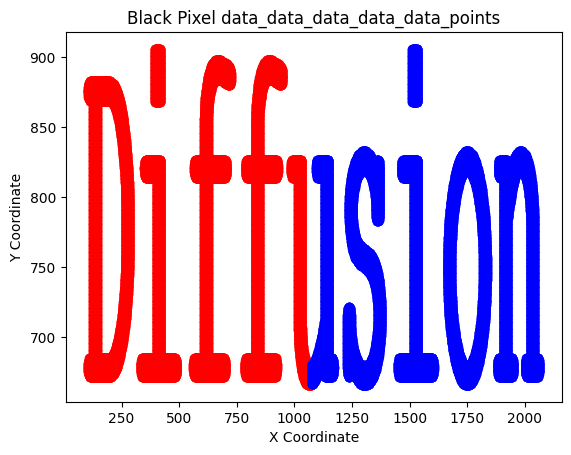

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'example.jpg'  # 白底黑字diffusion
img = Image.open(image_path)

img_gray = img.convert('L')
width, height = img_gray.size
black_pixels = []

# 遍历图片中的每个像素点
for x in range(width):
    for y in range(height):
        # 获取当前像素点的灰度值
        pixel_value = img_gray.getpixel((x, y))
        # 如果像素值小于某个阈值（这里假设为10），则认为是黑色
        if pixel_value < 10:
            black_pixels.append((x, y))

# 将数据分为两类，左边一半编号0，右边一半编号1
rev_black_pixels = [(x, height - y) for x, y in black_pixels]
left_rev_black_pixels = [(x, y) for x, y in rev_black_pixels if x < width / 2]
right_rev_black_pixels = [(x, y) for x, y in rev_black_pixels if x >= width / 2]

# 使用matplotlib绘制散点图
plt.scatter(*zip(*left_rev_black_pixels), color='red')  # 用红色点表示黑色像素点
plt.scatter(*zip(*right_rev_black_pixels), color='blue')  # 用红色点表示黑色像素点
plt.title('Black Pixel data_data_data_data_data_points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# 准备数据

In [ ]:
image_path = "example.jpg"

In [ ]:

image_processor = ImageProcessor()
X, Y = image_processor.get_dataset(args.image_path)

# 模型

要注释掉不用的那种对应的cell

In [1]:
output_dir = "ag_demo_mlp" # 从这里读checkpoint，生成图片也放这里

## DiT

In [2]:
from models import DiT
from models import SimpleMLPAdaLN

In [3]:
# def DiT_demo(**kwargs):
#     return DiT(depth=1, hidden_size=512, patch_size=1, num_heads=4, in_channels=2, **kwargs)
# model = DiT_demo(
#     input_size=1,
#     num_classes=2
# )
# type(model)

## SimpleMLPAdaLN

In [4]:
model = SimpleMLPAdaLN(
            in_channels=2,
            model_channels=512,
            out_channels=4, # in_channels * 2
            z_channels=1,
            num_res_blocks=2,
        )
type(model)

models.SimpleMLPAdaLN

## load checkpoint

In [5]:
model_load_path = f"./{output_dir}/model_3000.pt"

In [6]:
from diffusion import create_diffusion
import torch
diffusion = create_diffusion(timestep_respacing="")
device = torch.device("cuda:0")
model.to(device)
model_state_dict = torch.load(model_load_path)
model.load_state_dict(model_state_dict)
model.eval()

SimpleMLPAdaLN(
  (time_embed): TimestepEmbedder(
    (mlp): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): SiLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (cond_embed): Linear(in_features=1, out_features=512, bias=True)
  (input_proj): Linear(in_features=2, out_features=512, bias=True)
  (res_blocks): ModuleList(
    (0-1): 2 x ResBlock(
      (in_ln): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): SiLU()
        (2): Linear(in_features=512, out_features=512, bias=True)
      )
      (adaLN_modulation): Sequential(
        (0): SiLU()
        (1): Linear(in_features=512, out_features=1536, bias=True)
      )
    )
  )
  (final_layer): MLP_FinalLayer(
    (norm_final): LayerNorm((512,), eps=1e-06, elementwise_affine=False)
    (linear): Linear(in_features=512, out_features=4, bias=True)
    (adaLN_modul

# Sampling

In [ ]:
import torch
import matplotlib.pyplot as plt
from utils import sample_and_plot

guidance_scale=[1.0, 1.5, 2.0, 2.5, 3.0]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

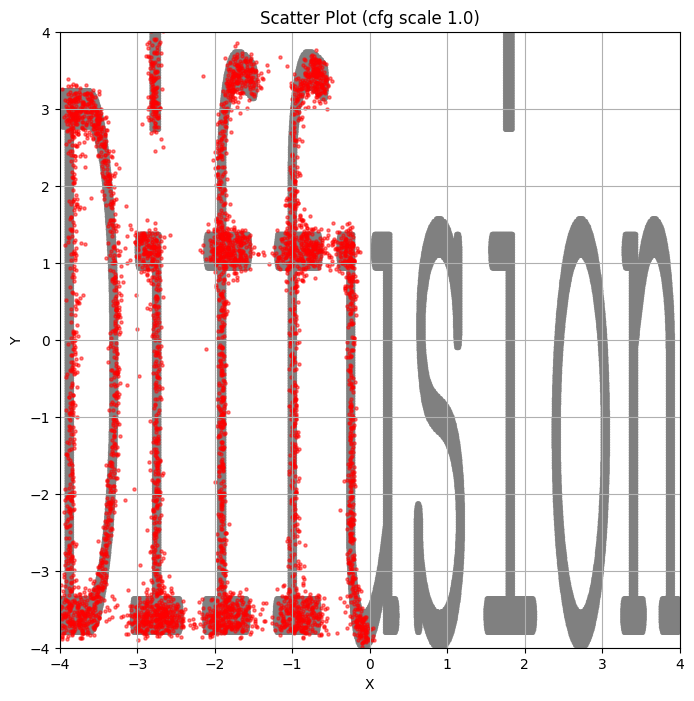

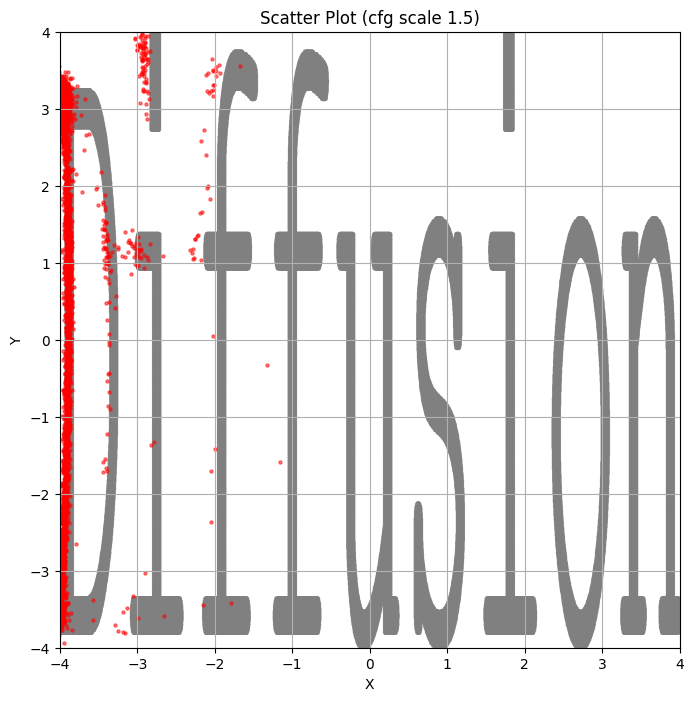

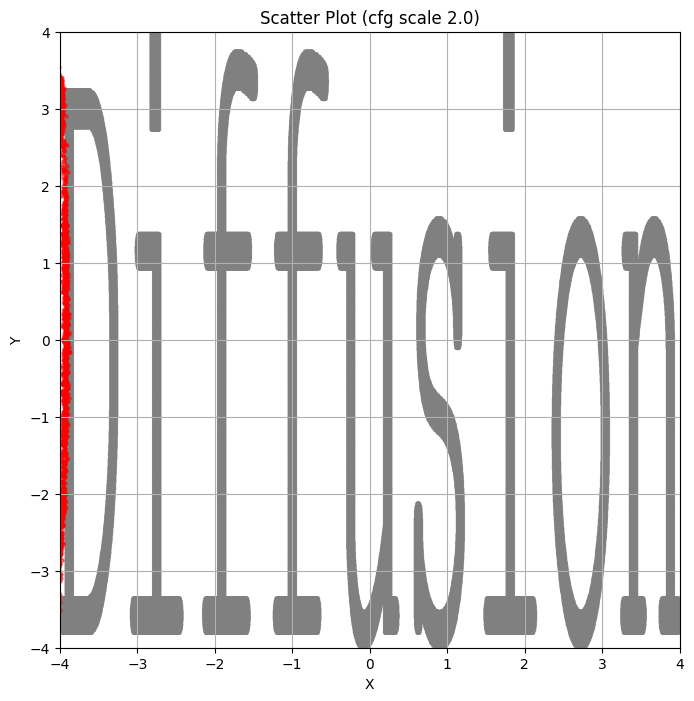

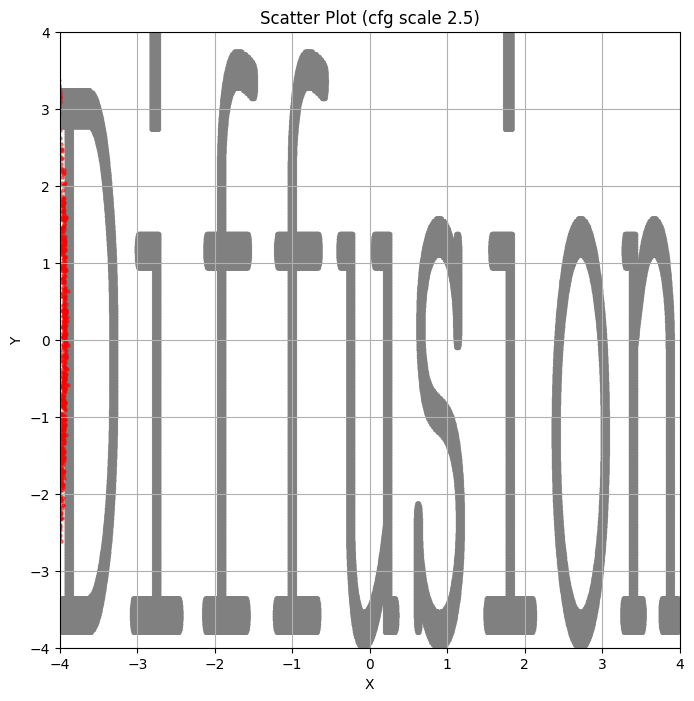

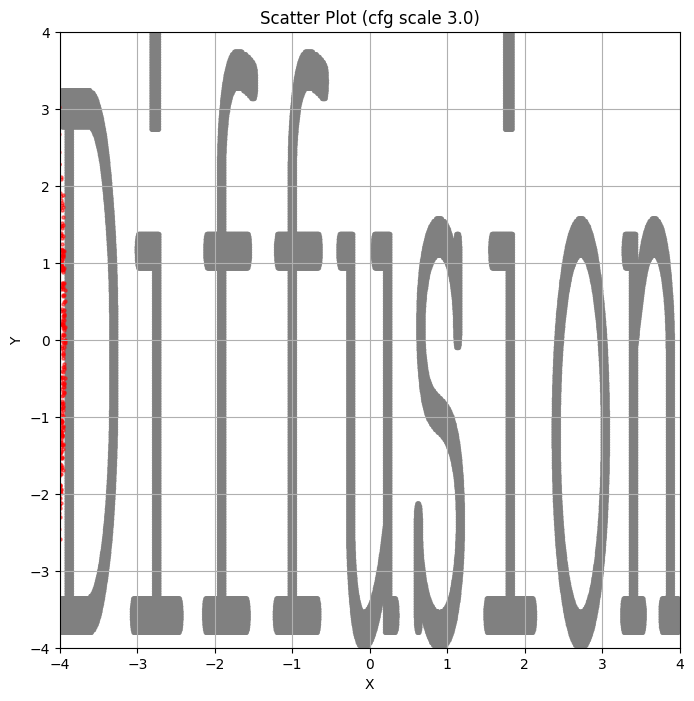

In [ ]:
sample_and_plot(
    model = model,
    c = 0,
    guidance_scale = guidance_scale,
    num_sample = 5000,
    num_class = 2,
    diffusion = diffusion,
    ori_dist=X,
    output_dir=output_dir,
    device=device,
    plot_color="red",
)

# Autoguidance


In [15]:
from models import DiT
from models import SimpleMLPAdaLN
import torch
import matplotlib.pyplot as plt


## load guide model

要注释掉不用的那边

### DiT guide

In [16]:
# def DiT_demo(**kwargs):
#     return DiT(depth=4, hidden_size=512, patch_size=1, num_heads=4, in_channels=2, **kwargs)
# gmodel = DiT_demo(
#     input_size=1,
#     num_classes=2
# )

### SimpleMLPAdaLN guide

In [17]:
gmodel = SimpleMLPAdaLN(
            in_channels=2,
            model_channels=512,
            out_channels=4, # in_channels * 2
            z_channels=1,
            num_res_blocks=2,
        )

## Load guide model's checkpoint

In [18]:
g_model_load_path = f"{output_dir}/model_2100.pt"

In [19]:
device = torch.device("cuda:0")
gmodel.to(device)
g_model_state_dict = torch.load(g_model_load_path)
gmodel.load_state_dict(g_model_state_dict)
gmodel.eval()

SimpleMLPAdaLN(
  (time_embed): TimestepEmbedder(
    (mlp): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): SiLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (cond_embed): Linear(in_features=1, out_features=512, bias=True)
  (input_proj): Linear(in_features=2, out_features=512, bias=True)
  (res_blocks): ModuleList(
    (0-1): 2 x ResBlock(
      (in_ln): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): SiLU()
        (2): Linear(in_features=512, out_features=512, bias=True)
      )
      (adaLN_modulation): Sequential(
        (0): SiLU()
        (1): Linear(in_features=512, out_features=1536, bias=True)
      )
    )
  )
  (final_layer): MLP_FinalLayer(
    (norm_final): LayerNorm((512,), eps=1e-06, elementwise_affine=False)
    (linear): Linear(in_features=512, out_features=4, bias=True)
    (adaLN_modul

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

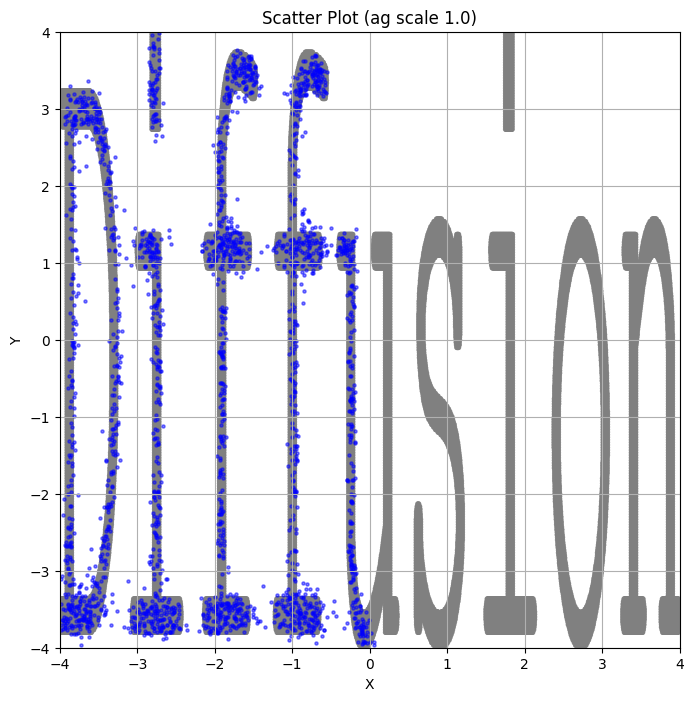

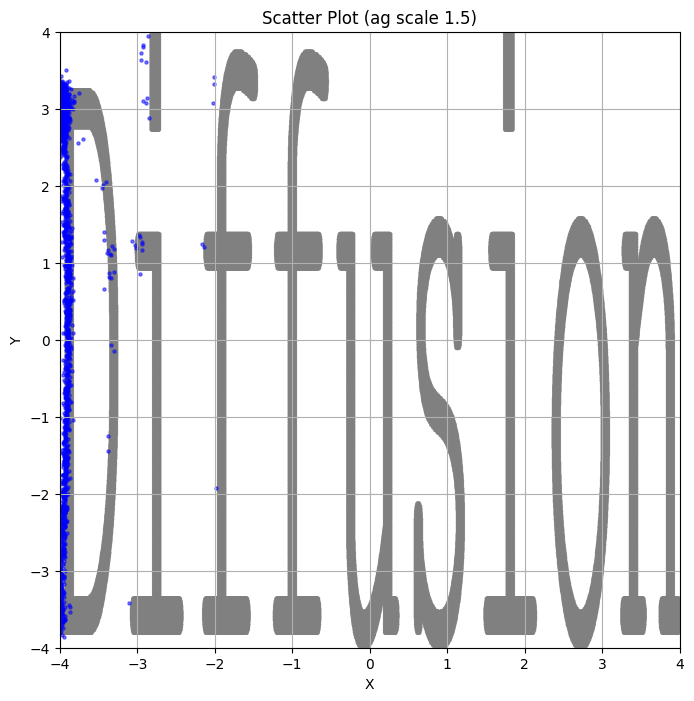

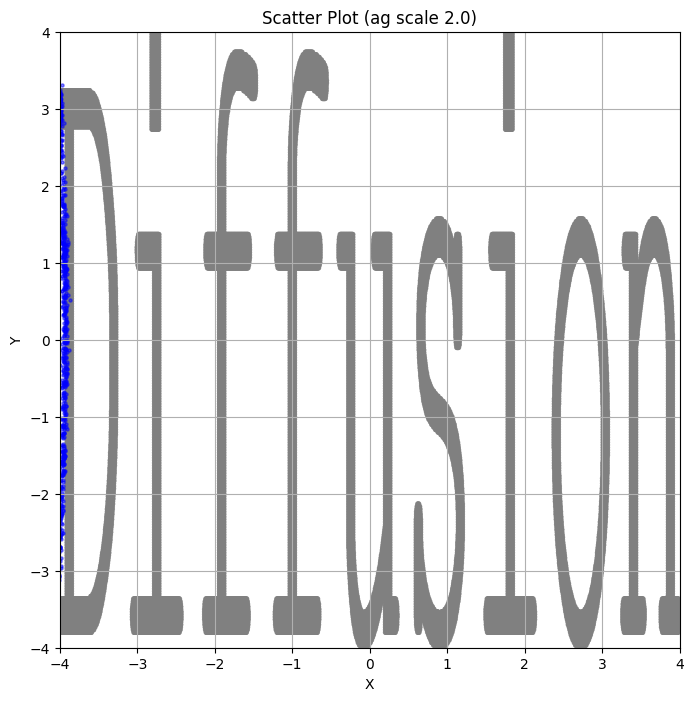

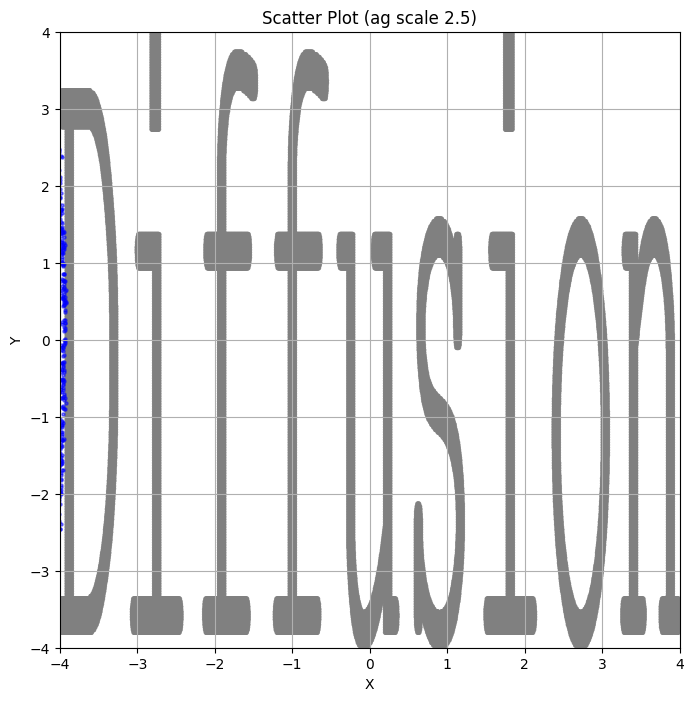

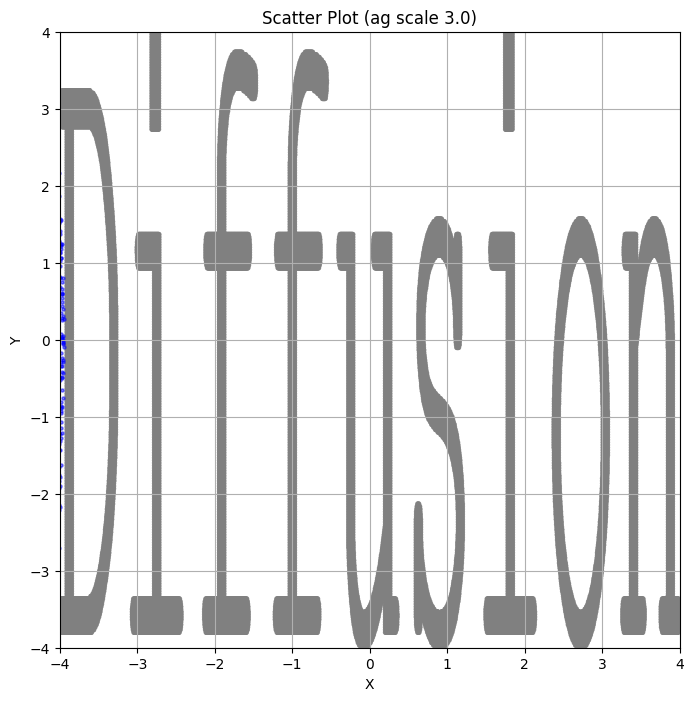

In [ ]:
sample_and_plot(
    model = model,
    c = 0,
    gmodel = gmodel,
    guidance_scale = guidance_scale,
    num_sample = 5000,
    num_class = 2,
    diffusion = diffusion,
    ori_dist=X,
    output_dir=output_dir,
    device=device,
    plot_color="blue",
)